CIR......


/Users/lianama/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/lianama/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


---------------------------------------------------

Results for Scaled Gradient Projection Method 

---------------------------------------------------

   Obj. function = 2.411666e+00

   Gradient norm = 1.883183e-04 

   ||X^T*X-I||_F = 9.51e-16

   Iteration number = 3000

   Cpu time (secs) = 24.8457

   Number of evaluation(Obj. func) = 3485



/var/folders/dr/k6wp_5ns5hj632l6j_ks1nc80000gn/T/ipykernel_1428/4277929860.py:78: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_curr[:, 0], X_curr[:, 1], s=100, c=colors[l], marker=markers[l])


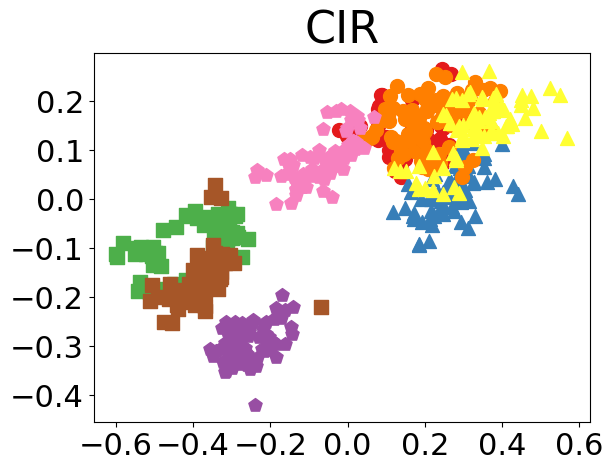

In [122]:
import numpy as np
import pandas as pd
import time
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import cir
from cir import CIR
from importlib import reload
reload(cir)

data = pd.read_csv('Data_Cortex_Nuclear.csv')

# foreground data
fg = data.dropna()

# foreground label
Y = fg['class']
Y = pd.Categorical(Y);
Y = Y.rename_categories({'c-CS-m': '0', 'c-CS-s': '1', 'c-SC-m': '2', 'c-SC-s': '3',
                         't-CS-m': '4', 't-CS-s': '5', 't-SC-m': '6', 't-SC-s': '7'})
Y = Y.astype(float)
labels = np.unique(Y)      # set of unique foreground labels
L = len(labels)         # number of foreground classes/slices
fg = fg.iloc[:, 1:78]
n = fg.shape[0] # foreground sample size
X = fg - np.mean(fg, axis=0)
X = X.values

# background data
bg = data[data['Genotype'] == 'Control'].copy()
bg = bg.dropna()

# background label 
Yt = bg['Behavior']
Yt = pd.Categorical(Yt)
Yt = Yt.rename_categories({'C/S': '0', 'S/C': '1'})

Yt = Yt.astype(float)
labelst = np.unique(Yt)   # set of unique background labels
Lt = len(labelst)       # number of background classes/slices
bg = bg.iloc[:, 1:78]
m, p = bg.shape

# tuning parameter alpha
alpha = 0.0001;
# reduce dimension from 77 to 2 for visualization
d = 2;

# CIR
print("CIR......")
start_time = time.time()

V_CIR = CIR(fg,Y,bg,Yt,alpha,d);
X_CIR = X @ V_CIR;


end_time = time.time()

# colors credit to Color Brewer
colors = [[228/255, 26/255, 28/255],
          [55/255, 126/255, 184/255],
          [77/255, 175/255, 74/255],
          [152/255, 78/255, 163/255],
          [255/255, 127/255, 0/255],
          [255/255, 255/255, 51/255],
          [166/255, 86/255, 40/255],
          [247/255, 129/255, 191/255]]

markers = ['o', '^', 's', 'p', 'o', '^', 's', 'p']

# plt.subplot(3, 3, 6)
# plt.hold(True)
for l in range(L):
    idx = np.where(Y == labels[l])[0]
    X_curr = X_CIR[idx, :]
    plt.scatter(X_curr[:, 0], X_curr[:, 1], s=100, c=colors[l], marker=markers[l])
# plt.hold(False)
plt.title('CIR', fontsize=32)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.show()